# Imports

In [2]:
# Librairies
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Fichiers
# url = 'sources/' # Jupyter (local)
url = 'https://raw.githubusercontent.com/gllmfrnr/oc/master/p4/sources/' # Github
customers =       pd.read_csv(url + 'customers.csv')
products =        pd.read_csv(url + 'products.csv')    
transactions =    pd.read_csv(url + 'transactions.csv')

In [4]:
# Styles
# Exemple : print(color.bold + 'Hello' + color.end)
class style:
   blue = '\033[94m'
   green = '\033[92m'
   red = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m' 

## Fonctions

In [5]:
# Fonction d'exploration des datasets
def exploration(df):
    print( 
        style.red + 'SAMPLE ↓ \n' + style.end,
        df.sample(3), '\n'                                              # Sample
        ) 
    print(style.red + 'INFO ↓ \n' + style.end)
    print(df.info(), '\n')                                              # Colonnes, null-count, types d'objets
    for i in range(0, len(df.columns)):
        print(
            style.red + 'COLONNE',
            style.bold + df.columns[i], ': \n' + style.end,             # Nom de colonne
             df.iloc[:, i].describe(), '\n',                            # .describe()
            sum(df.iloc[:, i].isna()), 'Nan \n',                        # Nbre de Nan 
            df.shape[0] - np.count_nonzero(df.iloc[:, i]), 'zéros \n',  # Nbre de 0
            len(df.iloc[:, i].unique()), 'valeurs uniques : \n',
            df.iloc[:, i].unique(), '\n'                                # Nombre de valeurs uniques 
        )

In [6]:
# Fonction de vérification et suppression de duplicats
def find_del_duplicates(df):
  print(  # Vérifier présence de duplicats
      len(df), 'lignes avant suppression \n' +
      'Nombre de duplicats :', len(df) - len(df.drop_duplicates())    
  )
  df.drop_duplicates(inplace=True)  # Suppression des duplicats
  print(len(df), 'lignes après suppression')

In [7]:
# Fonction de vérification de clé primaire
def verif_pk(df_pk):
  table_length = len(df_pk) - len(df_pk.drop_duplicates())
  if table_length == 0:
    print(style.green + 'C\'est bien une clé primaire (0 duplicat)' + style.end)
  else:
    print(
        style.red + 'Pas une clé primaire (',
        table_length, 'duplicats )' + style.end
        )

In [8]:
# Fonction de recherche de clé primaire (une seule colonne)
def pk(df,col): # Ne pas oublier les guillemets en déclarant le paramètre col
    x = 0
    df = df.reset_index()  
    for i in range(0,len(df)):   
        
        searched = df.loc[i][col] # Valeur à rechercher
    
        s = df[df[col]==searched].drop_duplicates() # Rechercher cette valeur dans toute la df, et supprimer les duplicates pour vérifier combien de lignes on obtient
  
        if len(s) == 1: # Si on obtient une seule ligne, c'est a priori une clé primaire
            x += 1
       
    if x == len(df): # Si pour chaque ligne de la df, la requêtes a ajouté 1 à x, alors x = la longueur de la dataframe
        print('\'', col, '\' est bien une clé primaire.')
    else:
        print('\'', col, '\' n\'est pas une clé primaire.')

# Fonction de recherche sur toute la dataframe
def dataframekeys(df):
  for i in range(0, len(df.columns)):
      print(pk(df, df.columns[i]))

In [9]:
# Fonction d'affichage des mesures de tendance centrale 
def mean_med_hist(df, mode_categorie, mode_valeurs):

  # Proportion des modalités dans la variable
  df[mode_categorie].value_counts(normalize=True).plot(kind='pie')
  plt.show()

  # Afficher box plots de la catégorie côte à côte
  df.boxplot(by=mode_categorie)
  plt.show()

  print('-'*40)
  print('Valeurs :', mode_valeurs)
  print('-'*40)
  for cat in df[mode_categorie].unique():

    sous_echantillon = df[df[mode_categorie] == cat] # Sélectionner tous les individus de la modalité
    print('-'*20) # Séparateur entre chaque modalité affichée
    print(mode_categorie, ':', cat)    # Nom de la modalité
    print(
        # Moyenne des valeurs de l'échantillon pour la variable
        'Moyenne : ', round(sous_echantillon[mode_valeurs].mean(), 2)) 
    print(
        # Médiane des valeurs de l'échantillon pour la variable
        'Médiane : ', round(sous_echantillon[mode_valeurs].median(), 2)) 
    print(
        # Mode des valeurs de l'échantillon pour la variable
        'Mode : ', sous_echantillon[mode_valeurs].mode().to_string(index=False)) 
    print(
        # Variance empirique
        'Variance : ', round(sous_echantillon[mode_valeurs].var(ddof=0), 2))  
    print(
        # Écart-type empirique
        'Écart-type : ', round(sous_echantillon[mode_valeurs].std(ddof=0), 2)) 
    print(
        # Coefficient de variation
        'Coeff. variation : ', 
        round(
            sous_echantillon[mode_valeurs].std(ddof=0) / sous_echantillon[mode_valeurs].mean(),
            2))
    print(
        # Skewness empirique
        'Skewness : ', round(sous_echantillon[mode_valeurs].skew(), 2)) 
    print(
        # Kurtosis
        'Kurtosis : ', round(sous_echantillon[mode_valeurs].kurtosis(), 2))

    # Créer et afficher histogramme    
    sous_echantillon[mode_valeurs].hist()
    plt.show()

    # Créer et afficher box plot
    sous_echantillon.boxplot(column=[mode_valeurs], vert=False)
    plt.show()

In [10]:
# Courbe de Lorenz et indice de Gini
def lorenz(observations):

  # Nombre d'observations
  n = len(observations)

  # LORENZ ↓↓

  #   ↓ Définir ordonnées
  #   Trier les individus par ordre croissant : np.sort()
  #   Calculer la somme cumulée : np.cumsum()
  #   Normaliser en divisant par la somme totale des observations : / .sum()
  lorenz = np.cumsum(np.sort(observations)) / observations.sum()
  #   La courbe de Lorenz débute à 0 (ajouter valeur 0 avant liste précédente)
  lorenz = np.append([0], lorenz)

  #   ↓ Définir ordonnées, de 0 à 1 à intervalles réguliers
  xaxis = np.linspace(0-1 / n, 1+1 / n, n+1)

  # GINI
  #     Surface sous la courbe de Lorenz
  AUC = (lorenz.sum() - lorenz[-1]/2 -lorenz[0]/2) / n
  #     Surface entre la 1ère bissectrice et la courbe de Lorenz
  S = 0.5 - AUC
  gini = 2*S

  print('Indice de Gini :', round(gini, 1))

  # Afficher la courbe
  plt.axes().axis('equal')
  plt.plot(xaxis, lorenz, drawstyle='steps-post')
  plt.ylim([0,1])
  plt.show()

# Exploration

## Datasets

### Customers
- 3 colonnes
    - client_id → identifiant unique pour chaque client (aucun doublon)
    - sex → genre (2 valeurs possibles : f ou m)
    - birth → année de naissance
- Clé primaire : **'client_id'**
- Aucune valeur dans le dataset n'est manquante
- Aucune valeur dans le dataset ne parait aberrante
- D'après le box plot : 
  - la répartition des âges est sensiblement la même chez les hommes et les femmes
  - la moitié des clients sont nés entre 1966 et 1992 (soit entre 28 et 54 ans à la date de sortie des données)
  - Sensiblement la même tranche chez les hommes et les femmes 

In [11]:
# Recherche et suppression des duplicats
find_del_duplicates(customers)

8623 lignes avant suppression 
Nombre de duplicats : 0
8623 lignes après suppression


In [12]:
exploration(customers)

SAMPLE ↓ 
      client_id sex  birth
773     c_5275   m   1964
5471    c_2497   f   2002
4312    c_5905   f   2004 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.5+ KB
None 

COLONNE client_id : 
 count       8623
unique      8623
top       c_2281
freq           1
Name: client_id, dtype: object 
 0 Nan 
 0 zéros 
 8623 valeurs uniques : 
 ['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84'] 

COLONNE sex : 
 count     8623
unique       2
top          f
freq      4491
Name: sex, dtype: object 
 0 Nan 
 0 zéros 
 2 valeurs uniques : 
 ['f' 'm'] 

COLONNE birth : 
 count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1

In [13]:
# Vérifier clé primaire
customers_pk = customers[['client_id']]
verif_pk(customers_pk)

C'est bien une clé primaire (0 duplicat)


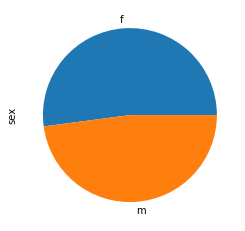

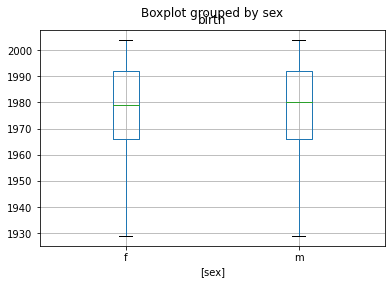

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
sex : f
Moyenne :  1977.99
Médiane :  1979.0
Mode :   2004
Variance :  292.28
Écart-type :  17.1
Coeff. variation :  0.01
Skewness :  -0.37
Kurtosis :  -0.61


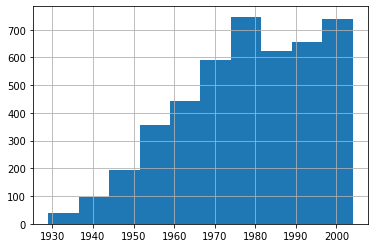

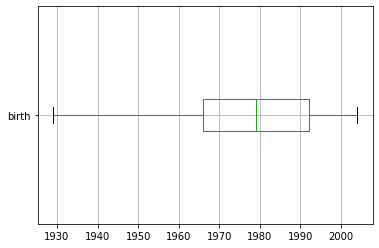

--------------------
sex : m
Moyenne :  1978.59
Médiane :  1980.0
Mode :   2004
Variance :  279.48
Écart-type :  16.72
Coeff. variation :  0.01
Skewness :  -0.34
Kurtosis :  -0.67


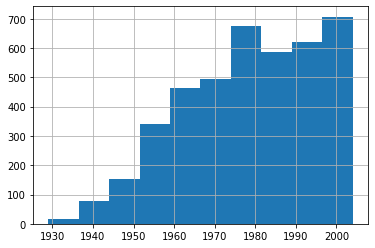

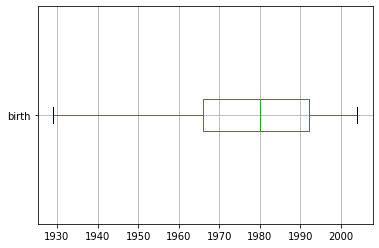

In [14]:
# Dates de naissance, par sexe
mean_med_hist(customers, 'sex', 'birth')

### Products
- 3 colonnes
  - id_prod : identifiant produit unique
  - price : prix (1455 valeurs différentes, pour 3287 produits-lignes)
  - categ : catégorie (3 valeurs différentes : 0, 1, 2)
- Clé primaire : **id_prod**
- Aucune valeur n'est manquante dans le dataset
- La colonne prix semble contenir des valeurs aberrantes (inférieures à 0)
- D'après le box plot, les 3 catégories définissent 3 gammes de prix, du moins cher (0) au plus cher (2)

In [15]:
# Recherche et suppression des duplicats
find_del_duplicates(products)

3287 lignes avant suppression 
Nombre de duplicats : 0
3287 lignes après suppression


In [16]:
exploration(products)

SAMPLE ↓ 
      id_prod  price  categ
2157  0_1766   4.55      0
3267   2_101  63.99      2
2739  0_1914  21.44      0 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB
None 

COLONNE id_prod : 
 count      3287
unique     3287
top       1_599
freq          1
Name: id_prod, dtype: object 
 0 Nan 
 0 zéros 
 3287 valeurs uniques : 
 ['0_1421' '0_1368' '0_731' ... '0_802' '1_140' '0_1920'] 

COLONNE price : 
 count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64 
 0 Nan 
 0 zéros 
 1455 valeurs uniques : 
 [19.99  5.13 17.99 ... 11.2

In [17]:
# Vérifier clé primaire
products_pk = products[['id_prod']]
verif_pk(products_pk)

C'est bien une clé primaire (0 duplicat)


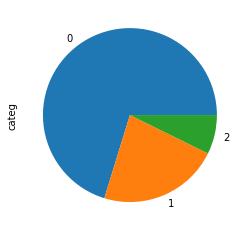

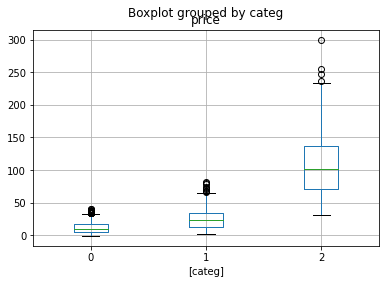

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 0
Moyenne :  11.73
Médiane :  10.32
Mode :   4.99
Variance :  57.26
Écart-type :  7.57
Coeff. variation :  0.65
Skewness :  0.84
Kurtosis :  0.33


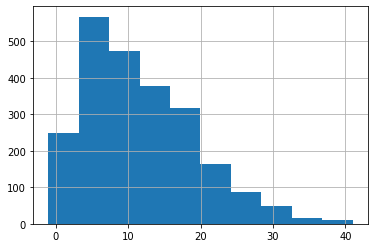

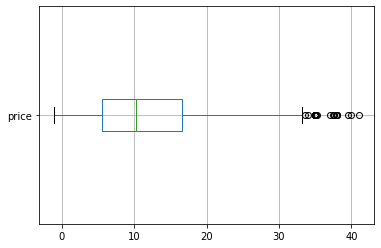

--------------------
categ : 1
Moyenne :  25.53
Médiane :  22.99
Mode :   22.99
 32.99
Variance :  237.61
Écart-type :  15.41
Coeff. variation :  0.6
Skewness :  0.81
Kurtosis :  0.3


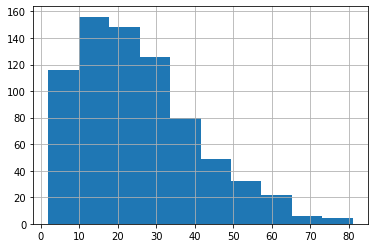

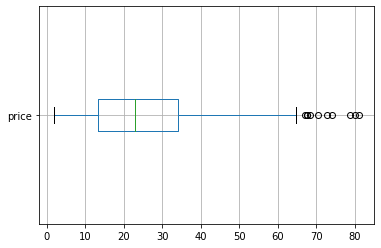

--------------------
categ : 2
Moyenne :  108.35
Médiane :  101.99
Mode :   50.99
 68.99
 69.99
Variance :  2446.06
Écart-type :  49.46
Coeff. variation :  0.46
Skewness :  0.93
Kurtosis :  0.81


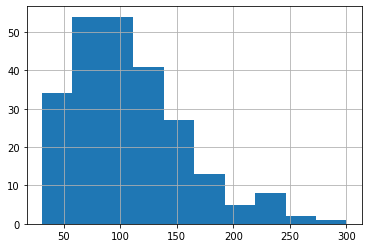

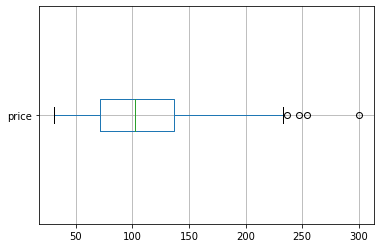

In [18]:
# Prix, par catégorie
mean_med_hist(products, 'categ', 'price')

Indice de Gini : 0.5


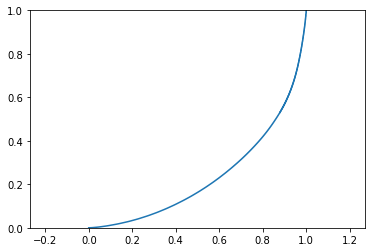

In [19]:
# Courbe de Lorenz sur les prix
lorenz(products['price'].values)

### Transactions
*4 colonnes :*
- 2 clés étrangères
  - id_prod (vers **products**)
  - client_id (vers **customers**)
- date : date de la transaction (336855 valeurs uniques)
- session_id : identifiant de session (169195 valeurs uniques)

*Insights :*
- Une session peut contenir plusieurs dates
- sensiblement moins de produits et de clients que dans les tables étrangères que référencent id_prod et client_id
- la valeur top de 'date' semble aberrante
- **clé primaire** : 'date' + 'client_id' 


In [20]:
# Recherche et suppression des duplicats
find_del_duplicates(transactions)

337016 lignes avant suppression 
Nombre de duplicats : 126
336890 lignes après suppression


In [21]:
exploration(transactions)

SAMPLE ↓ 
        id_prod                        date session_id client_id
116519  0_1804  2021-10-16 22:05:46.313912   s_105819    c_1609
303364   1_548  2021-04-14 23:04:27.937094    s_20664    c_8510
91284   0_1632  2021-04-18 07:07:17.441293    s_22196     c_131 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 12.9+ MB
None 

COLONNE id_prod : 
 count     336890
unique      3266
top        1_369
freq        1081
Name: id_prod, dtype: object 
 0 Nan 
 0 zéros 
 3266 valeurs uniques : 
 ['0_1483' '2_226' '1_374' ... '0_833' '0_1284' '0_1116'] 

COLONNE date : 
 count                              336890
unique                             336

In [22]:
# Vérifier clé primaire
transactions_pk = transactions[['date', 'client_id']]
verif_pk(transactions_pk)

C'est bien une clé primaire (0 duplicat)


## Dataset principal

### Jointures

In [23]:
# 1ère jointure erronée
# data = pd.merge(transactions, customers, on="client_id")
# data = pd.merge(data, products, on="id_prod")
#data

In [24]:
# Jointure externe gauche de customers sur transactions (pas besoin de préciser 'on=')
data = pd.merge(transactions, customers, how='left')

# Jointure externe gauche, avec products à droite
data = pd.merge(data, products, on="id_prod", how='left')

data

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [25]:
# Recherche et suppression des duplicats
find_del_duplicates(data)

336890 lignes avant suppression 
Nombre de duplicats : 0
336890 lignes après suppression


### Exploration

In [26]:
exploration(data)

SAMPLE ↓ 
        id_prod                        date session_id  ... birth  price  categ
56583     1_53  2021-06-20 23:12:17.820899    s_51490  ...  1994  28.99    1.0
244034   0_149  2021-04-04 21:05:06.745849    s_16030  ...  1980  17.99    0.0
174350  0_1480  2021-06-06 02:23:13.621562    s_44671  ...  1971   4.15    0.0

[3 rows x 8 columns] 

INFO ↓ 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  object 
 5   birth       336890 non-null  int64  
 6   price       336787 non-null  float64
 7   categ       336787 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB
None 

COLONNE id_prod : 
 count     336890
uni

# Nettoyage

## Valeurs aberrantes

### Colonne **price**
- contient 200 fois la valeur '-1' (le minimum) 
- contient 8 fois la valeur '300' (le maximum) : la colonne ne contient pourtant pas d'entiers (***à vérifier***), ni les valeurs '100' ou '200'

In [27]:
# 200 fois la valeur '-1'
data.sort_values(by=['price']).head(202)

,id_prod,date,session_id,client_id,sex,birth,price,categ
109577,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,m,2001,-1.00,0.0
59039,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,f,2001,-1.00,0.0
47169,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1,m,2001,-1.00,0.0
129823,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001,-1.00,0.0
151885,T_0,test_2021-03-01 02:30:02.237435,s_0,ct_1,m,2001,-1.00,0.0
...,...,...,...,...,...,...,...,...
152733,0_1459,2022-01-21 00:48:09.009192,s_152841,c_2119,f,1943,0.99,0.0
231182,0_2275,2021-03-11 02:37:32.876865,s_4656,c_1782,f,1988,0.99,0.0
297385,0_1408,2022-02-01 19:38:03.062357,s_158501,c_8327,m,1972,1.01,0.0
60484,0_1408,2021-05-27 22:27:22.649502,s_40425,c_7574,m,1986,1.01,0.0


### Colonne **date**
- ???Toutes les valeurs sont postérieures à la date d'extraction des données (2 avril 2020) 
- 2 années seulement : 2021 et 2022 ???

In [28]:
# Les 200 dernières valeurs sont contiennent le préfixe 'test_'
data.sort_values(by=['date'], ascending=False).head(202)

,id_prod,date,session_id,client_id,sex,birth,price,categ
38778,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0,f,2001,-1.00,0.0
203184,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,f,2001,-1.00,0.0
245271,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,2001,-1.00,0.0
317233,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0,f,2001,-1.00,0.0
26814,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1,m,2001,-1.00,0.0
...,...,...,...,...,...,...,...,...
238952,0_1448,2022-02-28 21:06:28.975642,s_172353,c_5698,f,1987,18.94,0.0
269119,1_456,2022-02-28 21:05:46.777420,s_172368,c_4593,m,1980,28.27,1.0
61543,2_164,2022-02-28 21:04:12.146400,s_172367,c_4958,m,1999,52.26,2.0
7503,0_1499,2022-02-28 21:04:01.765028,s_172365,c_4784,f,1981,11.99,0.0


In [29]:
# Vérifier si la colonne ne contient effectivement que 200 x la chaîne 'test'
data['date'].str.contains('test').value_counts()

False    336816
True         74
Name: date, dtype: int64

### Suppression des 200 lignes-test
La valeur '200' revient plusieurs fois dans l'analyse des aberrations : 
- 200 fois le préfixe 'test_' dans la colonne date
- 200 fois la valeur '-1' dans la colonne price'

Elles figurent dans les mêmes lignes : on supprime ces données

In [30]:
# Montrer que la combinaison des 2 valeurs ne renvoie bien que 200 lignes
lignes_test = data[(data['price']==-1) & (data['date'].str.contains('test'))]

print(lignes_test)

       id_prod                             date session_id  ... birth price  categ
1431       T_0  test_2021-03-01 02:30:02.237420        s_0  ...  2001  -1.0    0.0
2365       T_0  test_2021-03-01 02:30:02.237446        s_0  ...  2001  -1.0    0.0
2895       T_0  test_2021-03-01 02:30:02.237414        s_0  ...  2001  -1.0    0.0
5955       T_0  test_2021-03-01 02:30:02.237441        s_0  ...  2001  -1.0    0.0
7283       T_0  test_2021-03-01 02:30:02.237434        s_0  ...  2001  -1.0    0.0
...        ...                              ...        ...  ...   ...   ...    ...
264229     T_0  test_2021-03-01 02:30:02.237416        s_0  ...  2001  -1.0    0.0
288815     T_0  test_2021-03-01 02:30:02.237415        s_0  ...  2001  -1.0    0.0
293003     T_0  test_2021-03-01 02:30:02.237421        s_0  ...  2001  -1.0    0.0
298292     T_0  test_2021-03-01 02:30:02.237423        s_0  ...  2001  -1.0    0.0
317233     T_0  test_2021-03-01 02:30:02.237448        s_0  ...  2001  -1.0    0.0

[74

In [31]:
# Nombre de lignes avant nettoyage
print('Nombre de lignes avant nettoyage :', len(data))

# Supprimer les lignes test de la dataframe, via leur index
data.drop(lignes_test.index, inplace=True)

# Nombre de lignes après nettoyage
print('Nombre de lignes après nettoyage :', len(data))

Nombre de lignes avant nettoyage : 336890
Nombre de lignes après nettoyage : 336816


## ? Problème de dates ?

In [32]:
# Convertir la colonne date en Timestamp
data['date'] = pd.to_datetime(data['date'])

type(data.loc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
data.loc[0]['date'].month

4

## Valeurs manquantes
- après jointure, on a trouvé des Nan dans les colonnes 'categ' et 'price'
- ces valeurs manquantes concernent un seul produit présent dans transactions mais absent de products

In [34]:
# Vérification de la présence de NaN dans les colonnes 'categ' et 'price'
# Et idenfication du produit concerné
def verif_nan(colonne):
  # Lignes ayant une valeur nulle dans 'colonne'
  null = data[data[colonne].isnull()]
  print(
    'Il y a', len(null), 'lignes ayant Nan pour \'' + colonne + '\'\n'
    'Toutes ont', null['id_prod'].unique(), 'pour \'id_prod\''
  )

verif_nan('categ')
verif_nan('price')

Il y a 103 lignes ayant Nan pour 'categ'
Toutes ont ['0_2245'] pour 'id_prod'
Il y a 103 lignes ayant Nan pour 'price'
Toutes ont ['0_2245'] pour 'id_prod'


In [35]:
# Population totale du produit '0_2245'
produit_z = data[data['id_prod']=='0_2245']
produit_z.sample(5)

,id_prod,date,session_id,client_id,sex,birth,price,categ
210524,0_2245,2021-04-18 08:28:11.501497,s_22209,c_3496,f,1957,NaN,NaN
305494,0_2245,2021-03-28 21:39:14.337424,s_12792,c_2688,f,1968,NaN,NaN
150592,0_2245,2022-02-08 22:29:01.498906,s_162143,c_4510,m,1982,NaN,NaN
136085,0_2245,2021-04-03 20:53:18.047006,s_15574,c_2142,m,1990,NaN,NaN
239899,0_2245,2021-09-07 20:55:19.719028,s_86505,c_8153,f,1975,NaN,NaN


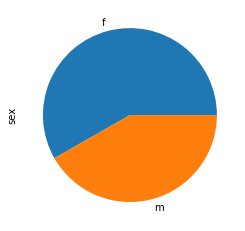

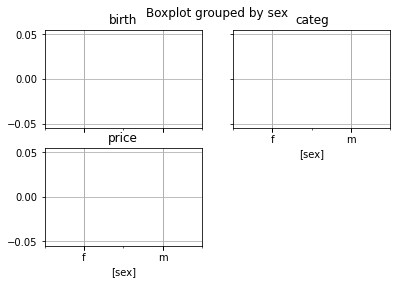

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
sex : m
Moyenne :  1978.21
Médiane :  1981.0
Mode :   1986
Variance :  150.82
Écart-type :  12.28
Coeff. variation :  0.01
Skewness :  -1.76
Kurtosis :  4.93


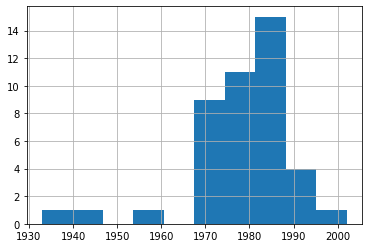

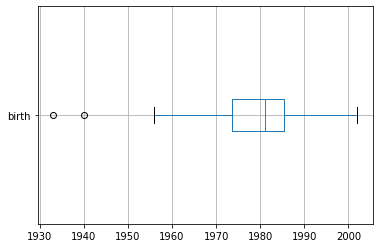

--------------------
sex : f
Moyenne :  1976.58
Médiane :  1978.5
Mode :   1978
Variance :  126.74
Écart-type :  11.26
Coeff. variation :  0.01
Skewness :  -1.37
Kurtosis :  2.88


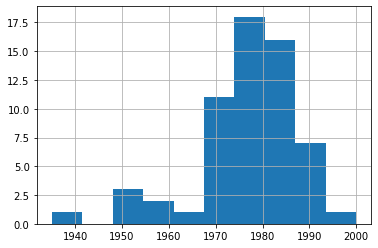

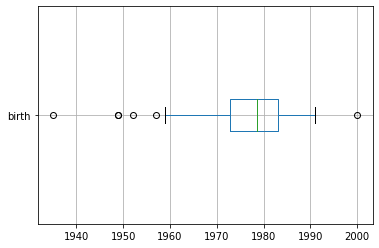

In [36]:
# Indicateurs de tendance centrale du produit '0_2245'
mean_med_hist(produit_z, 'sex', 'birth')

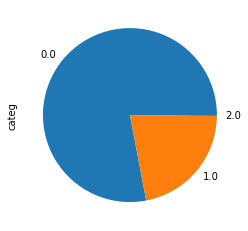

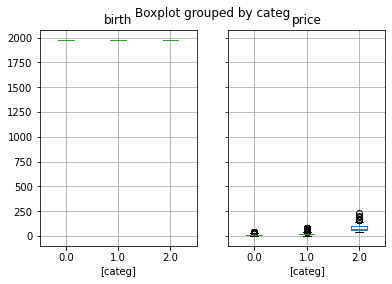

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 1.0
Moyenne :  20.49
Médiane :  19.44
Mode :   15.99
Variance :  57.65
Écart-type :  7.59
Coeff. variation :  0.37
Skewness :  1.85
Kurtosis :  9.08


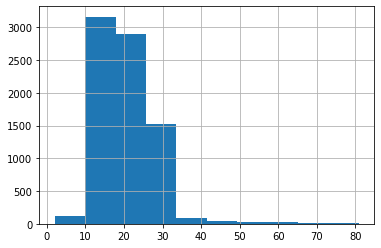

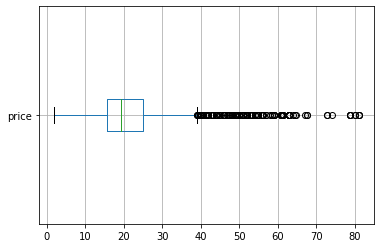

--------------------
categ : 0.0
Moyenne :  10.66
Médiane :  9.99
Mode :   4.99
Variance :  24.36
Écart-type :  4.94
Coeff. variation :  0.46
Skewness :  0.42
Kurtosis :  -0.42


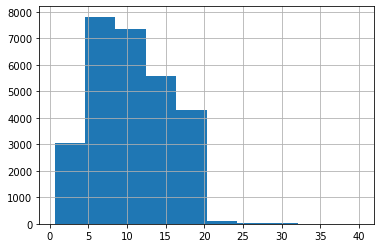

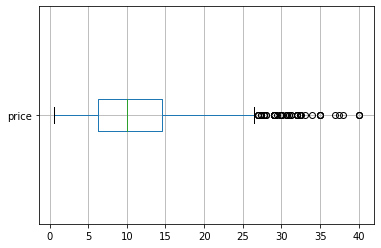

--------------------
categ : 2.0
Moyenne :  82.85
Médiane :  67.57
Mode :   68.99
Variance :  1850.87
Écart-type :  43.02
Coeff. variation :  0.52
Skewness :  1.69
Kurtosis :  2.09


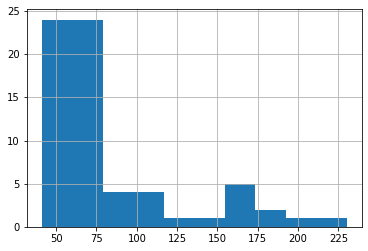

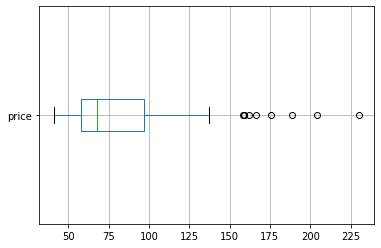

--------------------
categ : nan
Moyenne :  nan
Médiane :  nan
Mode :  Series([], )
Variance :  nan
Écart-type :  nan
Coeff. variation :  nan
Skewness :  nan
Kurtosis :  nan


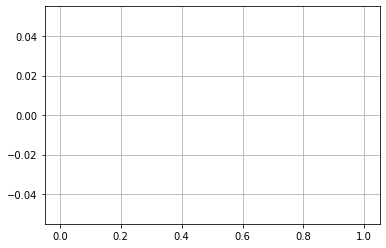

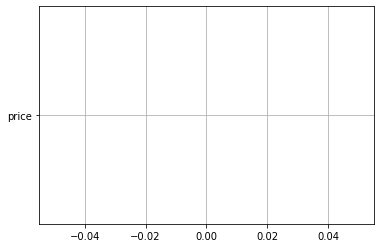

In [37]:
# Une majorité des acheteurs sont nés entre 1978 (femmes) et 1981 (hommes)
# Une légère majorité sont des femmes, mais on garde ces 2 médianes comme limites de classe
sous_echantillon_produit_z = data[(data['birth']>1978) & (data['birth']<1981)]

# Indicateurs de tendance centrale du sous-échantillon
mean_med_hist(sous_echantillon_produit_z, 'categ', 'price')

In [38]:
# Une majorité d'individus dans le sous-échantillon a 0 pour catégorie
# Dans ce même échantillon, la catégorie 0 a un prix médian de 9.99 (très proche d'ailleurs du prix moyen)
# On remplace par ces valeurs les données manquantes du produit '0_2245'
data['categ'].replace(np.nan, 0, inplace=True)
data['price'].replace(np.nan, 9.99, inplace=True)

data[data['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,9.99,0.0
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,9.99,0.0
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,9.99,0.0
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,9.99,0.0
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,9.99,0.0
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,9.99,0.0
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,9.99,0.0
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,9.99,0.0
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,9.99,0.0


# Statistiques

## Indicateurs de tendance centrale

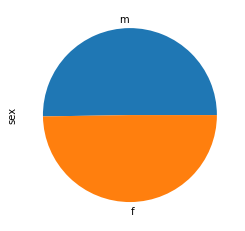

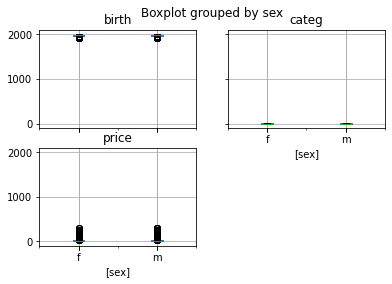

----------------------------------------
Valeurs : birth
----------------------------------------
--------------------
sex : f
Moyenne :  1977.26
Médiane :  1979.0
Mode :   1968
Variance :  191.74
Écart-type :  13.85
Coeff. variation :  0.01
Skewness :  -0.56
Kurtosis :  0.34


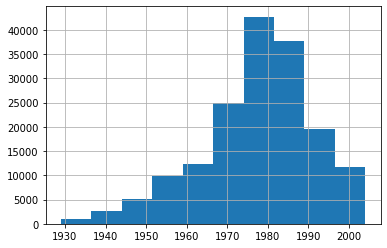

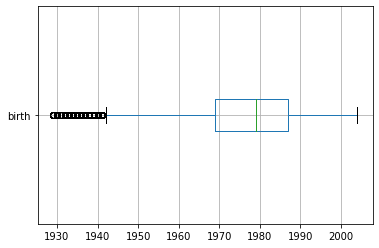

--------------------
sex : m
Moyenne :  1978.38
Médiane :  1980.0
Mode :   1980
Variance :  173.52
Écart-type :  13.17
Coeff. variation :  0.01
Skewness :  -0.59
Kurtosis :  0.56


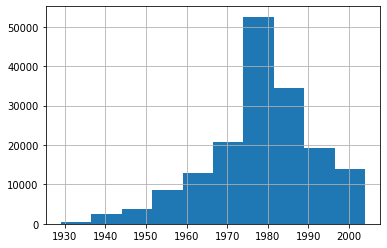

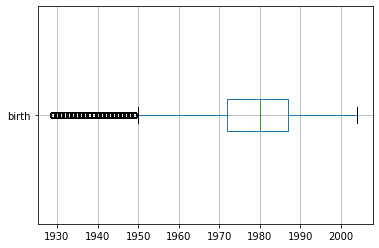

In [39]:
# Dates de naissance, par sexe
mean_med_hist(data, 'sex', 'birth')

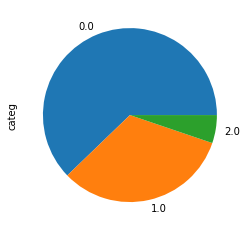

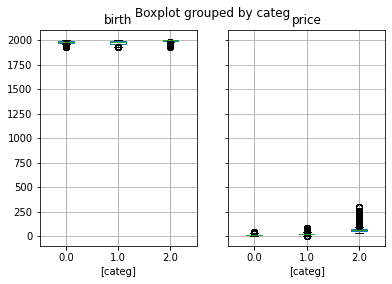

----------------------------------------
Valeurs : price
----------------------------------------
--------------------
categ : 0.0
Moyenne :  10.65
Médiane :  9.99
Mode :   4.99
Variance :  24.29
Écart-type :  4.93
Coeff. variation :  0.46
Skewness :  0.43
Kurtosis :  -0.37


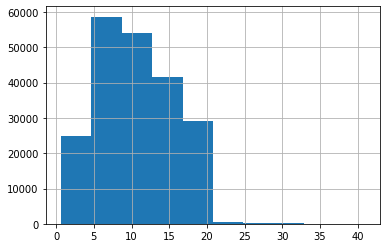

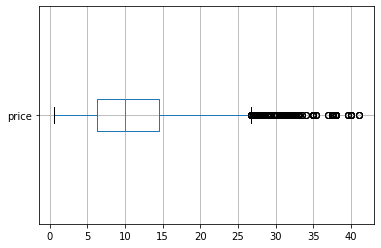

--------------------
categ : 2.0
Moyenne :  75.17
Médiane :  62.83
Mode :   68.99
Variance :  1527.16
Écart-type :  39.08
Coeff. variation :  0.52
Skewness :  2.32
Kurtosis :  5.54


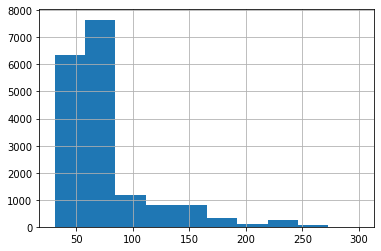

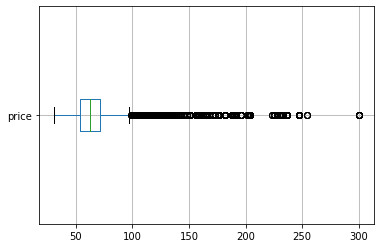

--------------------
categ : 1.0
Moyenne :  20.48
Médiane :  19.08
Mode :   15.99
Variance :  57.29
Écart-type :  7.57
Coeff. variation :  0.37
Skewness :  1.73
Kurtosis :  8.15


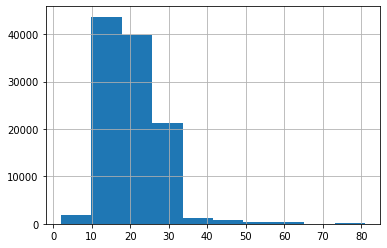

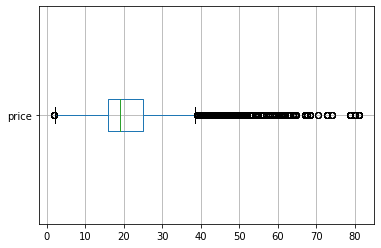

In [40]:
mean_med_hist(data, 'categ', 'price')

Indice de Gini : 0.4


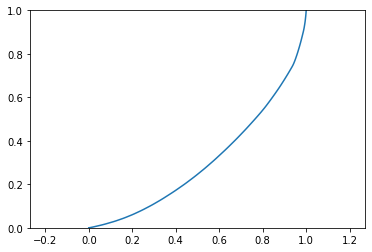

In [41]:
# Courbe de Lorenz sur les prix
lorenz(data['price'].values)

# 80% des transactions représentent 50% du chiffre d'affaires

In [42]:
# Catégories, par sexe
# mean_med_hist(data, 'sex', 'categ')

In [43]:
# Prix, par sexe
# mean_med_hist(data, 'sex', 'price')

In [44]:
# Prix, par catégorie
# mean_med_hist(data, 'categ', 'price')

In [45]:
# Années de naissance, par catégorie
# mean_med_hist(data, 'categ', 'birth')